/var/folders/vm/_zft15050r7cfh47y6v5z4k40000gn/T/ipykernel_79049/1595950202.py:45: DeprecationWarning: `id` is deprecated, use `element_id` instead
  G.add_node(start.id, label=start["name"] if "name" in start.keys() else "Unnamed")
/var/folders/vm/_zft15050r7cfh47y6v5z4k40000gn/T/ipykernel_79049/1595950202.py:46: DeprecationWarning: `id` is deprecated, use `element_id` instead
  G.add_node(end.id, label=end["name"] if "name" in end.keys() else "Unnamed")
/var/folders/vm/_zft15050r7cfh47y6v5z4k40000gn/T/ipykernel_79049/1595950202.py:47: DeprecationWarning: `id` is deprecated, use `element_id` instead
  G.add_edge(start.id, end.id, type=item["type"])


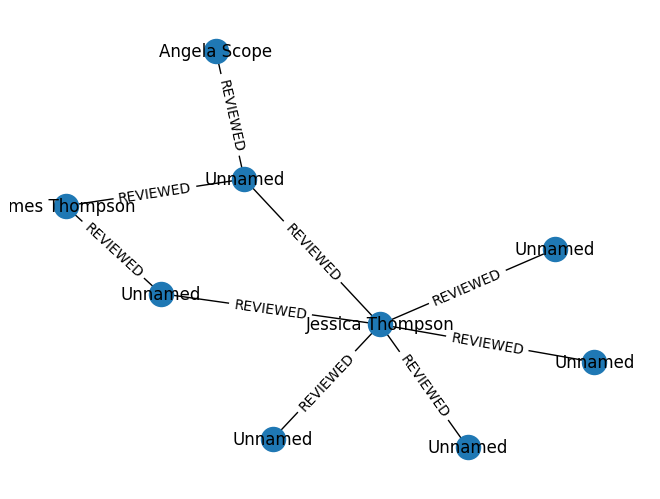

In [1]:
from neo4j import GraphDatabase
import networkx as nx
import matplotlib.pyplot as plt
import os
from dotenv import load_dotenv

# 載入環境變量
load_dotenv()

# 自己的資料庫連接信息
YOUR_URI = os.getenv("NEO4J_URI")
YOUR_USER = os.getenv("NEO4J_USER")
YOUR_PASSWORD = os.getenv("NEO4J_PASSWORD")

# 建立連接
driver = GraphDatabase.driver(YOUR_URI, auth=(YOUR_USER, YOUR_PASSWORD))

# 可替換這段語法來繪製不同的圖
def fetch_data():
    """從 Neo4j 中提取數據"""
    query = """
    MATCH p=()-[:REVIEWED]->() RETURN p LIMIT 25;
    """
    data = []
    with driver.session() as session:
        results = session.run(query)
        for record in results:
            for rel in record["p"].relationships:
                data.append({
                    "start_node": rel.start_node,
                    "end_node": rel.end_node,
                    "type": rel.type,
                    "properties": dict(rel)
                })
    return data

# 從 Neo4j 中提取數據
data = fetch_data()

# 創建 NetworkX 圖形
G = nx.Graph()

for item in data:
    start, end = item["start_node"], item["end_node"]
    G.add_node(start.id, label=start["name"] if "name" in start.keys() else "Unnamed")
    G.add_node(end.id, label=end["name"] if "name" in end.keys() else "Unnamed")
    G.add_edge(start.id, end.id, type=item["type"])

# 繪製圖形
# 定義佈局
pos = nx.spring_layout(G)
labels = {node: G.nodes[node]['label'] for node in G.nodes()}
nx.draw(G, pos, labels=labels, with_labels=True)
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): G[u][v]['type'] for u, v in G.edges()})
plt.show()

# 關閉連線
driver.close()
